<a href="https://colab.research.google.com/github/Zuccubus/SFTW1CapProject/blob/main/NYCRealestatePricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [138]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [139]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import warnings

# ignores warnings 
warnings.filterwarnings("ignore")

# keeps all plots in the notebook screen
%matplotlib inline

In [140]:
# read the dataset
dataset = pd.read_csv('/content/drive/MyDrive/MyCapstoneProject/NY Realstate Pricing.csv')

In [141]:
# look at first 5 observations
dataset.head()

F1    id       neighbourhood  latitude  longitude        room_type  price  \
0   0  2595             Midtown  40.75362  -73.98377  Entire home/apt    225   
1   1  3831            Brooklyn  40.68514  -73.95976  Entire home/apt     89   
2   2  5099           Manhattan  40.74767  -73.97500  Entire home/apt    200   
3   3  5121  Bedford-Stuyvesant  40.68688  -73.95596     Private room     60   
4   4  5178           Manhattan  40.76489  -73.98493     Private room     79   

   days_occupied_in_2019  minimum_nights  number_of_reviews  \
0                     15              10                 48   
1                    188               1                295   
2                    362               3                 78   
3                      0              29                 49   
4                    141               2                454   

   reviews_per_month  availability_2020  
0               0.39                  1  
1               4.67                  1  
2               0.60                 19  
3               0.38                365  
4               3.52                242

In [142]:
dataset.tail() # looks at last 5 observations

F1        id    neighbourhood  latitude  longitude    room_type  \
17609  28313  23691588         Brooklyn  40.69312  -73.94073  Shared room   
17610  17415  14712466         Brooklyn  40.65446  -73.92613  Shared room   
17611  27827  23184420  Lower East Side  40.71172  -73.98864  Shared room   
17612  29127  24555212        Manhattan  40.71113  -73.98840  Shared room   
17613  25441  21628183        Manhattan  40.71165  -73.98708  Shared room   

       price  days_occupied_in_2019  minimum_nights  number_of_reviews  \
17609     32                      9              31                  5   
17610     99                      7             100                  1   
17611     41                     14             180                  2   
17612     38                      0             180                  1   
17613     41                    124             180                  3   

       reviews_per_month  availability_2020  
17609               0.26                  1  
17610               0.03                  0  
17611               0.12                365  
17612               0.27                365  
17613               0.13                351

In [143]:
# checking shape of dataset, makes sure it was imported properly
dataset.shape

(17614, 12)

In [144]:
# get attribute names
dataset.columns

Index(['F1', 'id', 'neighbourhood', 'latitude', 'longitude', 'room_type',
       'price', 'days_occupied_in_2019', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'availability_2020'],
      dtype='object')

In [145]:
# find how many unique values there are in the data for each attribute
dataset.nunique()

F1                       17614
id                       17614
neighbourhood              186
latitude                 11598
longitude                 9886
room_type                    4
price                      461
days_occupied_in_2019      365
minimum_nights              68
number_of_reviews          408
reviews_per_month          815
availability_2020          366
dtype: int64

In [146]:
# info about attributes and types in dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17614 entries, 0 to 17613
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   F1                     17614 non-null  int64  
 1   id                     17614 non-null  int64  
 2   neighbourhood          17614 non-null  object 
 3   latitude               17614 non-null  float64
 4   longitude              17614 non-null  float64
 5   room_type              17614 non-null  object 
 6   price                  17614 non-null  int64  
 7   days_occupied_in_2019  17614 non-null  int64  
 8   minimum_nights         17614 non-null  int64  
 9   number_of_reviews      17614 non-null  int64  
 10  reviews_per_month      17614 non-null  float64
 11  availability_2020      17614 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 1.6+ MB


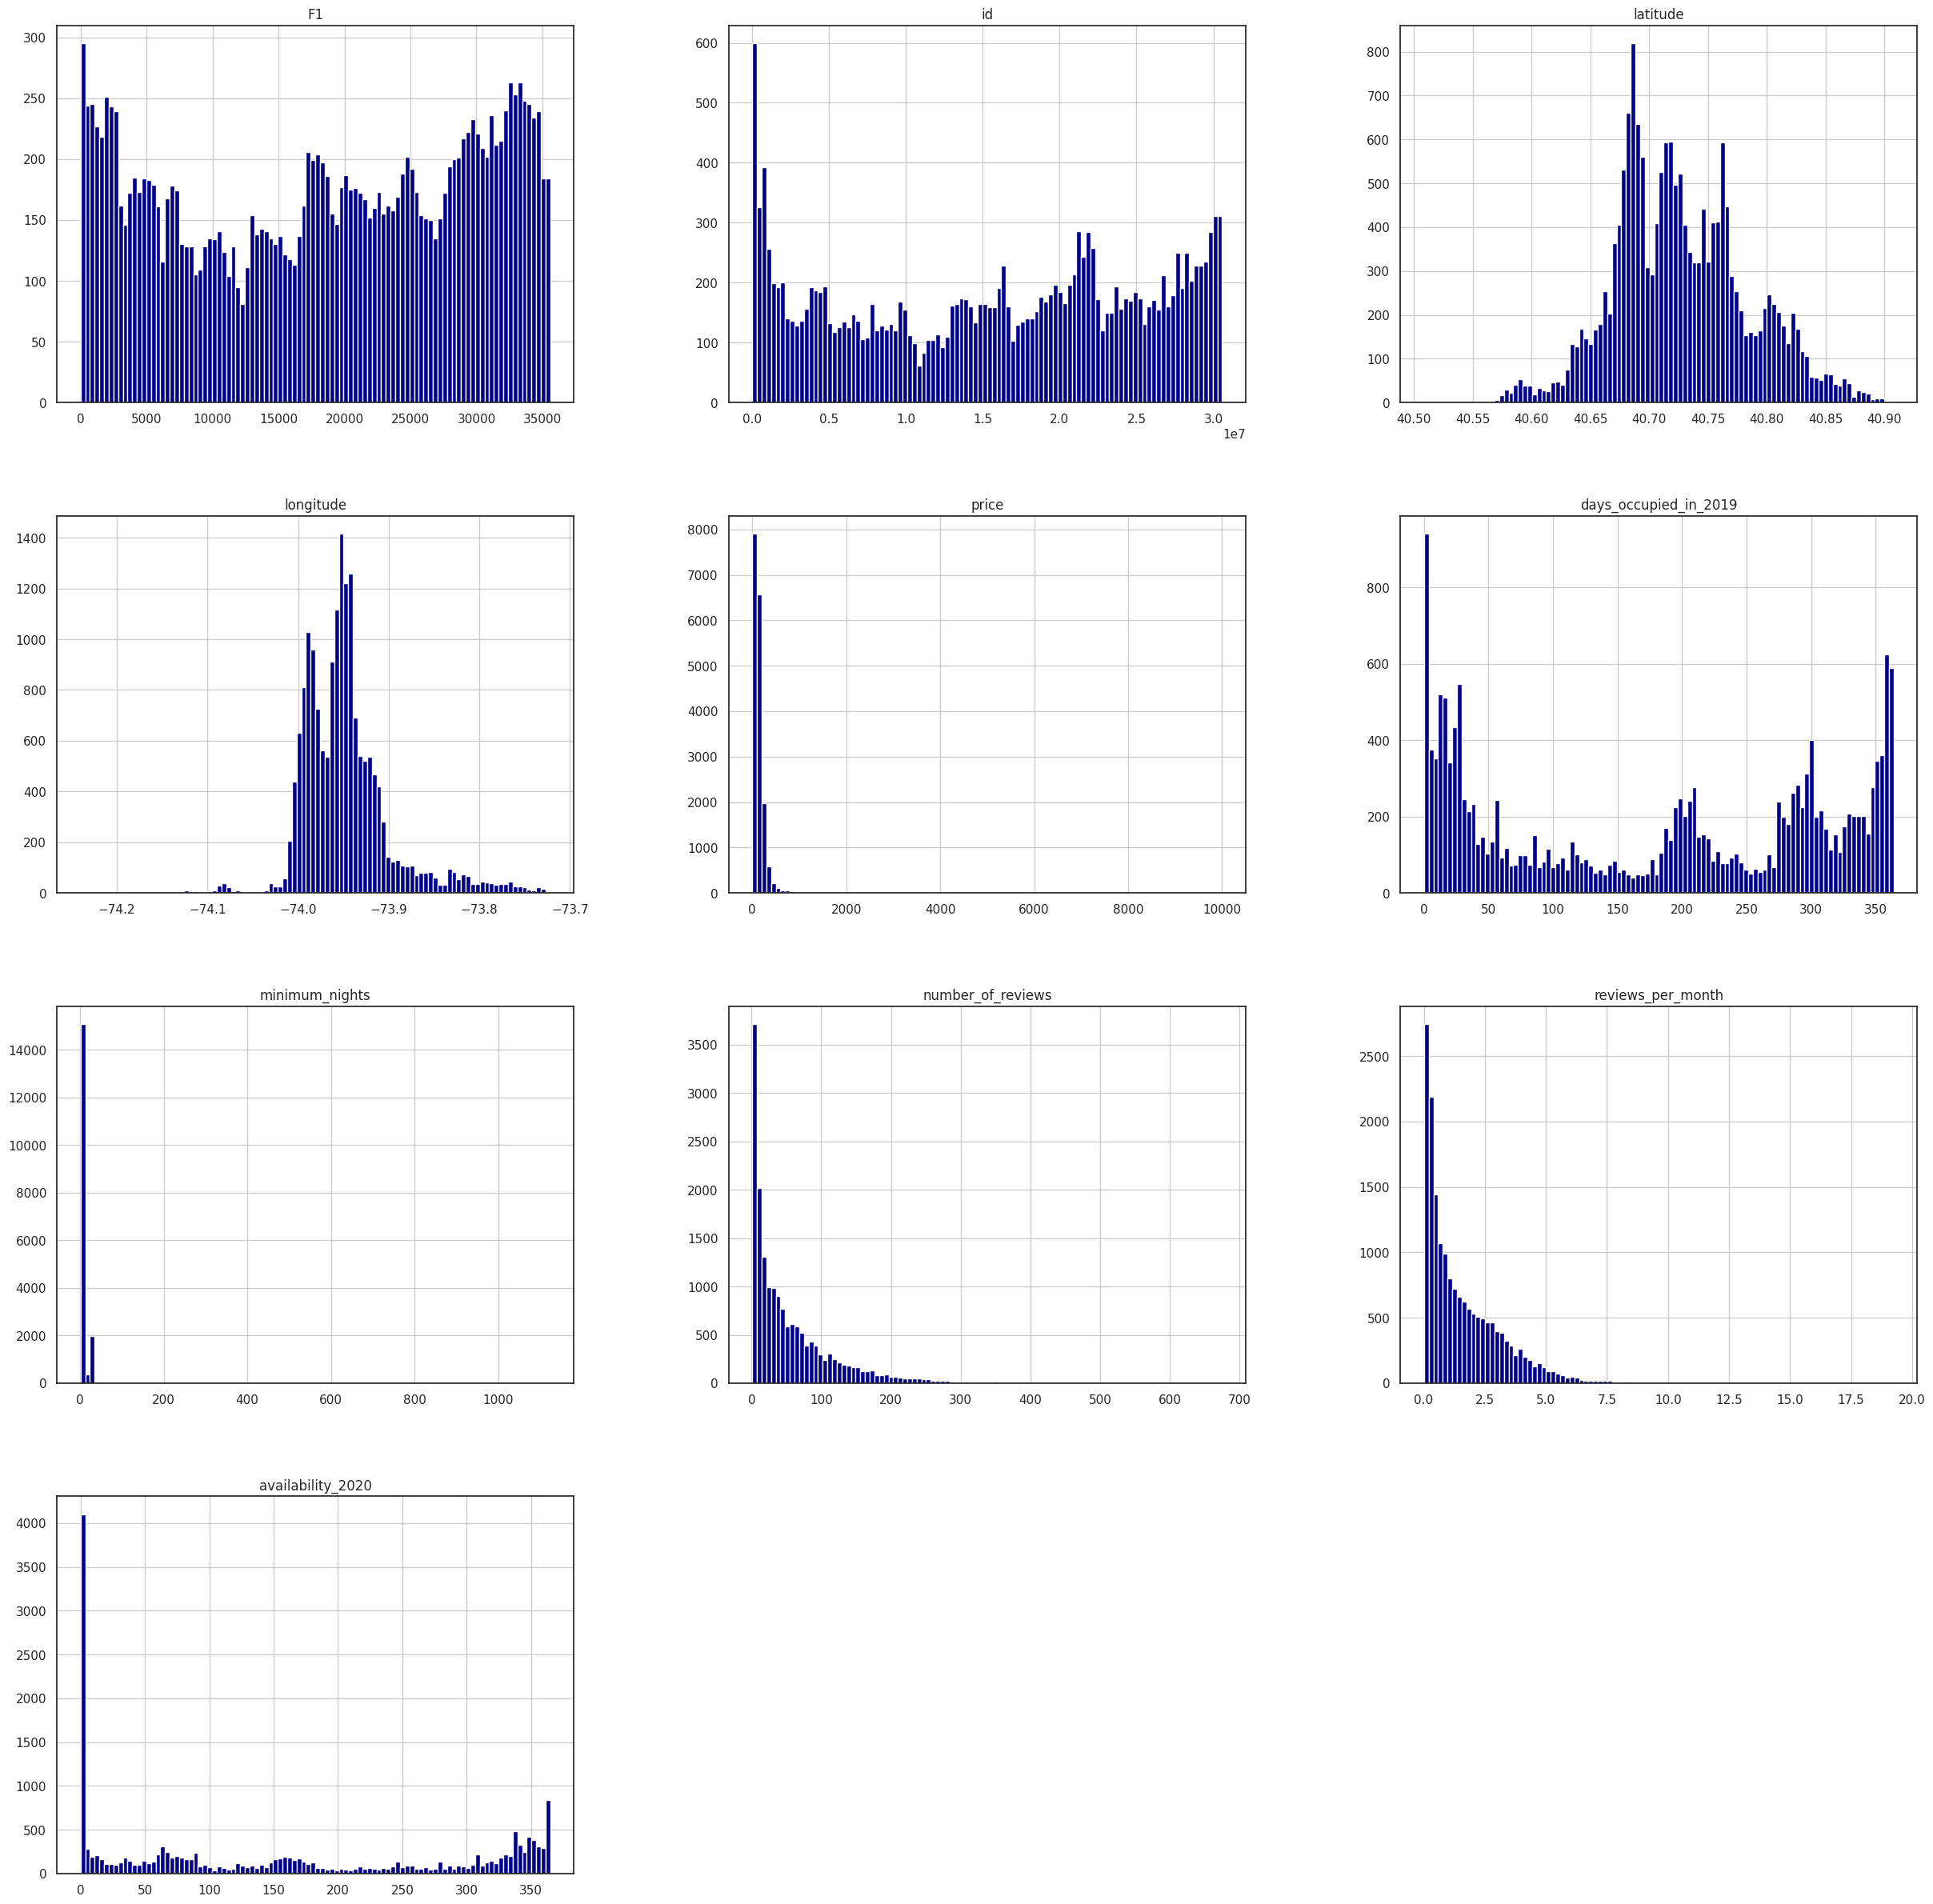

In [147]:
# Visualisation of data distribution

# creating subplots and setting plot sizes
figure = plt.figure(figsize = (30,30))
ax = figure.gca()

# accessing database and seperating values into 100 bins
dataset.hist(ax=ax, bins = 100, color = "darkblue")

# display the plots
plt.show()

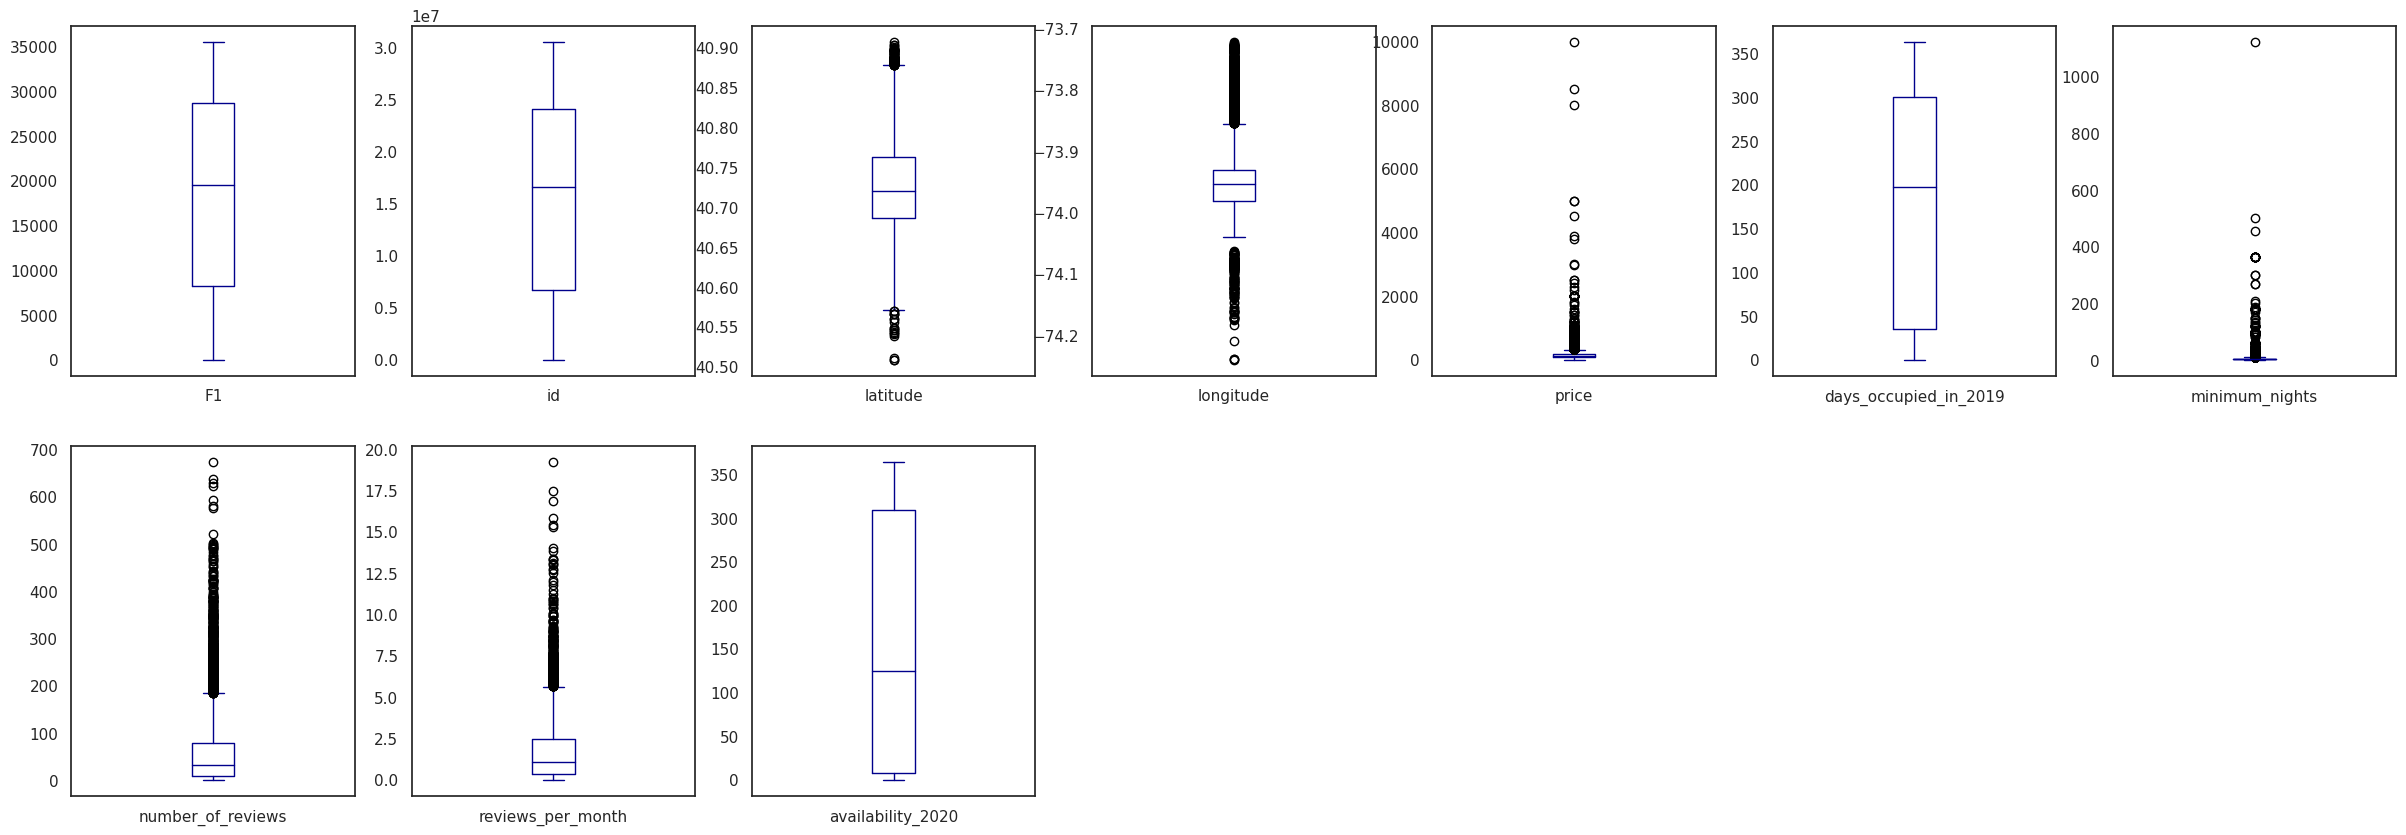

In [148]:
# showing outliers through boxplots
dataset.plot(kind='box', subplots=True, layout=(2,7), figsize=(30, 10), color='darkblue');

In [149]:
# define outliers
outlier_list = ['price','minimum_nights','number_of_reviews','reviews_per_month']  # list of outliers

In [150]:
# detects and optionally removes outliers
def outliers(dataset_outliers, drop = False):
    for attribute in dataset_outliers.columns:
        # getting the outlier attribute data
        outlier_data = dataset_outliers[attribute] 

        # getting first and third quartile of the outlier data
        Q1 = np.percentile(outlier_data, 25.) 
        Q3 = np.percentile(outlier_data, 75.) 

        interquartile_range = Q3-Q1 
        # determining unacceptable values that are outside of range using constant
        out_acceptable = interquartile_range * 1.5 # 1.5 is a constant for finding outliers
        # subtracting the IQR*1.5 from Q1 to find bottom outliers, adding IQR*1.5 to Q2 to find top outliers
        attribute_outliers = outlier_data[~((outlier_data >= Q1 - out_acceptable) & (outlier_data <= Q3 + out_acceptable))].index.tolist()

        if not drop: # show outliers
            print(f"For the feature {attribute}, No of Outliers is {len(attribute_outliers)}")

        if drop: # remove the outliers from the attributes
            dataset.drop(attribute_outliers, inplace = True, errors = 'ignore')
            print(f"{attribute} outliers removed from dataset")

In [151]:
# show the outliers and the amount
outliers(dataset[outlier_list])

For the feature price, No of Outliers is 954
For the feature minimum_nights, No of Outliers is 2731
For the feature number_of_reviews, No of Outliers is 932
For the feature reviews_per_month, No of Outliers is 415


In [152]:
# remove outliers
outliers(dataset[outlier_list], drop = True)

price outliers removed from dataset
minimum_nights outliers removed from dataset
number_of_reviews outliers removed from dataset
reviews_per_month outliers removed from dataset


In [153]:
# checking the number of remaining outliers
outliers(dataset[outlier_list])

For the feature price, No of Outliers is 302
For the feature minimum_nights, No of Outliers is 1807
For the feature number_of_reviews, No of Outliers is 217
For the feature reviews_per_month, No of Outliers is 75


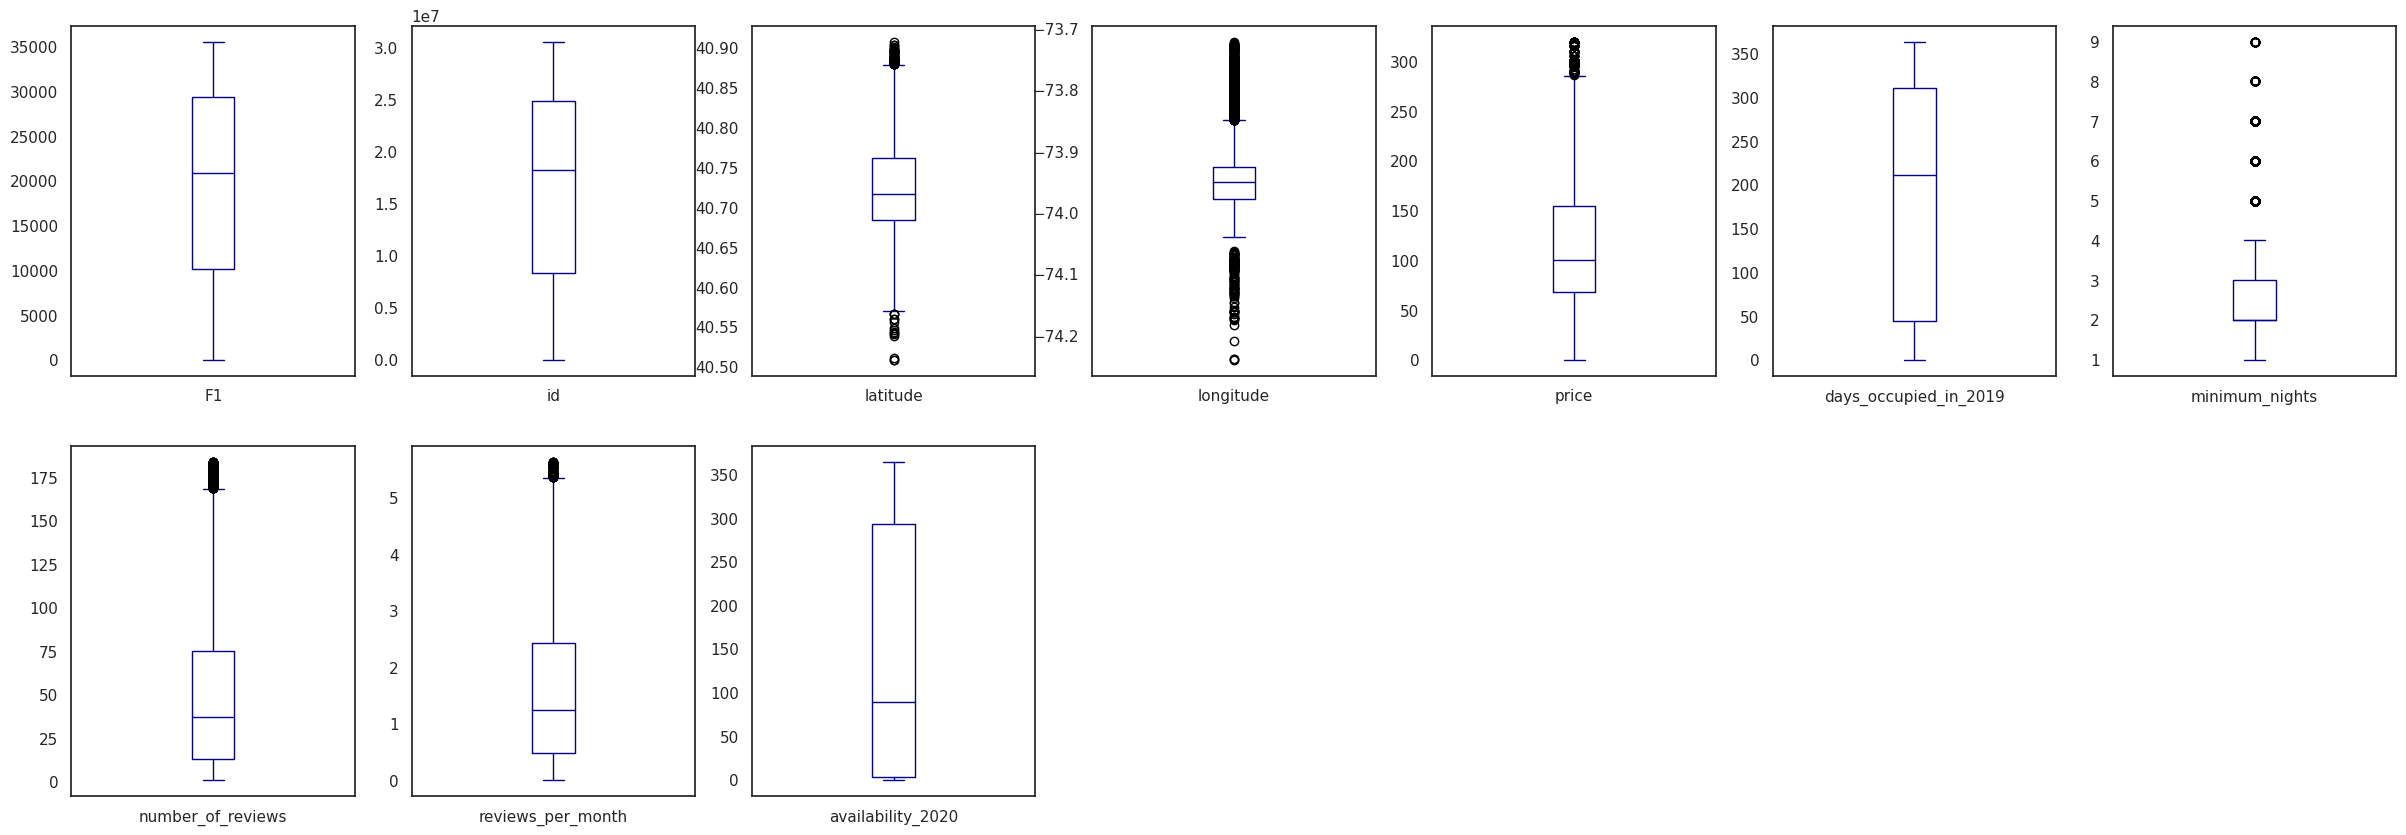

In [154]:
# visual check for outlier removal if outliers
dataset.plot(kind='box', subplots=True, layout=(2,7), figsize=(30, 10), color='darkblue');

In [155]:
# checking what data looks like after outlier removal
dataset.shape

(12913, 12)

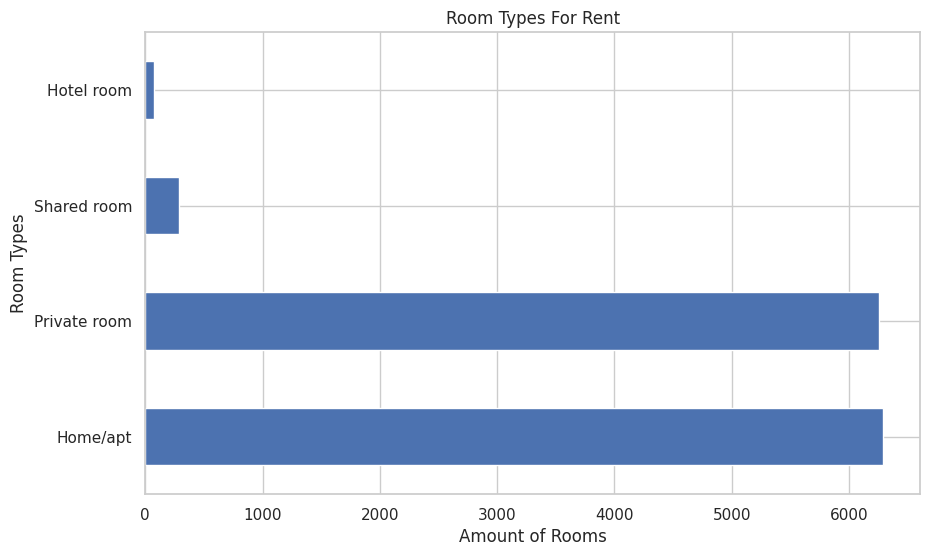

In [156]:
# room type (target variable) distribution
sns.set(style = "whitegrid") # found style method in seaborn documentation https://seaborn.pydata.org/tutorial/aesthetics.html

# list of potential room types
room_types = ["Home/apt", "Private room", "Shared room", "Hotel room"]

# get data for graph
data = dataset.room_type.value_counts()

# create horizontal bar graph with matplotlib
# found graph in matplotlib documentation 
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.barh.html#matplotlib.axes.Axes.barh
ax = data.plot.barh(figsize=(10,6)) 
ax.set_title("Room Types For Rent")

#labels
ax.set_xlabel("Amount of Rooms")
ax.set_ylabel("Room Types")
ax.set_yticklabels(room_types)

plt.show()

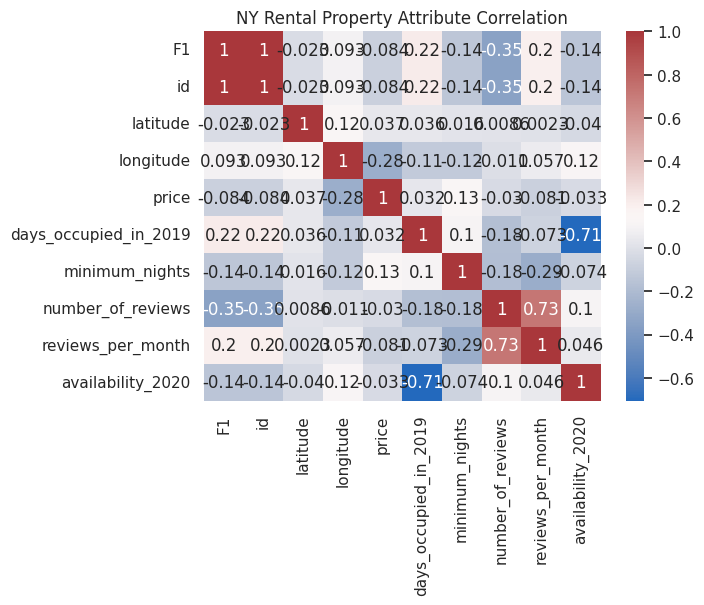

In [157]:
# visualisation of variable relationships with heatmap
sns.set_style("white")
# setting figure width, height
plt.figsize = (15, 10)
# create seaborn heatmap with values in squares
sns.heatmap(dataset.corr(), annot = True, cmap ="vlag") # colour found in seaborn documentation https://seaborn.pydata.org/tutorial/color_palettes.html
plt.title('NY Rental Property Attribute Correlation')
plt.show()

In [158]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Preparing metadata (setup.py) ... done


In [159]:
# profiler report to chack against manual EDA
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport

# create profile
profile = ProfileReport(dataset,title="NYC Rental Property EDA", html={'style':{'full_width':True}})
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [160]:
# pre-processing data for prediction
from sklearn.exceptions import DataDimensionalityWarning

# encode object columns to integer values
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder

for col in dataset:
    if dataset[col].dtype =="object":
        # reshaping attributes that are objects
        dataset[col]=OrdinalEncoder().fit_transform(dataset[col].values.reshape(-1,1))
dataset


F1        id  neighbourhood  latitude  longitude  room_type  price  \
2          2      5099          100.0  40.74767  -73.97500        0.0    200   
5          6      5238           99.0  40.71344  -73.99037        0.0    150   
7          8      5803          127.0  40.66829  -73.98779        2.0     89   
9         10      6848          175.0  40.70837  -73.95352        0.0    140   
11        13      7726           17.0  40.67592  -73.94694        0.0     99   
...      ...       ...            ...       ...        ...        ...    ...   
17560  32540  28157869           45.0  40.65329  -73.92756        3.0     50   
17561  33628  29233391           59.0  40.85442  -73.88498        3.0     30   
17562  29865  25348802          109.0  40.75815  -73.96489        3.0    165   
17563  22523  19533701          111.0  40.61249  -73.96018        3.0     32   
17564  33760  29364167          154.0  40.85466  -73.88505        3.0     30   

       days_occupied_in_2019  minimum_nights  number_of_reviews  \
2                        362               3                 78   
5                         86               1                161   
7                         12               4                175   
9                        319               2                170   
11                       172               3                 75   
...                      ...             ...                ...   
17560                    186               7                  1   
17561                     57               7                  3   
17562                    350               7                  1   
17563                     25               7                  3   
17564                     57               7                  1   

       reviews_per_month  availability_2020  
2                   0.60                 19  
5                   1.29                  1  
7                   1.35                  0  
9                   1.33                  0  
11                  4.43                 63  
...                  ...                ...  
17560               0.07                179  
17561               0.22                339  
17562               0.39                 12  
17563               0.19                335  
17564               0.07                339  

[12913 rows x 12 columns]

In [161]:
class_label = dataset['room_type']
dataset = dataset.drop(['room_type'], axis =1)
dataset = (dataset-dataset.min())/(dataset.max()-dataset.min())
dataset['room_type']=class_label
dataset

F1        id  neighbourhood  latitude  longitude     price  \
2      0.000000  0.000000       0.558659  0.598432   0.511244  0.625000   
5      0.000112  0.000005       0.553073  0.512720   0.481576  0.468750   
7      0.000169  0.000023       0.709497  0.399664   0.486556  0.278125   
9      0.000225  0.000057       0.977654  0.500025   0.552705  0.437500   
11     0.000309  0.000086       0.094972  0.418770   0.565406  0.309375   
...         ...       ...            ...       ...        ...       ...   
17560  0.914143  0.921224       0.251397  0.362104   0.602814  0.156250   
17561  0.944710  0.956417       0.329609  0.865735   0.685004  0.093750   
17562  0.838990  0.829305       0.608939  0.624674   0.530758  0.515625   
17563  0.632719  0.639021       0.620112  0.259941   0.539850  0.100000   
17564  0.948418  0.960697       0.860335  0.866336   0.684869  0.093750   

       days_occupied_in_2019  minimum_nights  number_of_reviews  \
2                   0.994505           0.250           0.420765   
5                   0.236264           0.000           0.874317   
7                   0.032967           0.375           0.950820   
9                   0.876374           0.125           0.923497   
11                  0.472527           0.250           0.404372   
...                      ...             ...                ...   
17560               0.510989           0.750           0.000000   
17561               0.156593           0.750           0.010929   
17562               0.961538           0.750           0.000000   
17563               0.068681           0.750           0.010929   
17564               0.156593           0.750           0.000000   

       reviews_per_month  availability_2020  room_type  
2               0.104796           0.052055        0.0  
5               0.227353           0.002740        0.0  
7               0.238011           0.000000        2.0  
9               0.234458           0.000000        0.0  
11              0.785080           0.172603        0.0  
...                  ...                ...        ...  
17560           0.010657           0.490411        3.0  
17561           0.037300           0.928767        3.0  
17562           0.067496           0.032877        3.0  
17563           0.031972           0.917808        3.0  
17564           0.010657           0.928767        3.0  

[12913 rows x 12 columns]

In [162]:
# pre-processing dataset for PDA
nyc_rental_data = dataset.copy()
le = preprocessing.LabelEncoder()
F1 = le.fit_transform(list(nyc_rental_data["F1"])) # identifier
id = le.fit_transform(list(nyc_rental_data["id"])) # identifier
neighbourhood = le.fit_transform(list(nyc_rental_data["neighbourhood"])) # location 
latitude = le.fit_transform(list(nyc_rental_data["latitude"])) # location 
longitude = le.fit_transform(list(nyc_rental_data["longitude"])) # location 
days_occupied_in_2019 = le.fit_transform(list(nyc_rental_data["days_occupied_in_2019"])) 
minimum_nights = le.fit_transform(list(nyc_rental_data["minimum_nights"])) 
number_of_reviews = le.fit_transform(list(nyc_rental_data["number_of_reviews"])) 
reviews_per_month = le.fit_transform(list(nyc_rental_data["reviews_per_month"]))
availability_2020 = le.fit_transform(list(nyc_rental_data["availability_2020"]))
price = le.fit_transform(list(nyc_rental_data["price"])) # price in USD
room_type = le.fit_transform(list(nyc_rental_data["room_type"])) # 4 types 0 = house, 1 = hotel, 2= private, 3 = shared

In [163]:
# attributes used to predict target value
x = list(zip(neighbourhood, latitude, longitude, days_occupied_in_2019, minimum_nights, number_of_reviews, reviews_per_month, availability_2020, price))
# target value, room type
y = list(room_type) 

num_folds = 5
seed = 7

# what the prediction is scored on
scoring = 'accuracy'

In [164]:
import sklearn.model_selection
# seperating dataset into test set (80%) and train set (20%)
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.20, random_state=seed)

In [165]:
# appearance of training and test datasets using numpy
np.shape(x_train), np.shape(x_test)

((10330, 9), (2583, 9))

In [166]:
# modules from scikit learn to create a PDA, including predictive models
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [167]:
# list of models used
predictive_models = []

# four models that will be tested for predictive accuracy
predictive_models.append(("NB", GaussianNB()))
predictive_models.append(("SVM", SVC()))
predictive_models.append(("RF", RandomForestClassifier()))
predictive_models.append(("GBM", GradientBoostingClassifier()))

model_results = []
model_names = []


print("Performance on Training set")
# go through model list and use each one
for name, model in predictive_models:
    kfold = KFold(n_splits=num_folds,shuffle=True,random_state=seed)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring="accuracy")
    # adding model name and accuracy to lists
    model_results.append(cv_results)
    model_names.append(name)
    # outputing results of model
    print(f"{name}: {cv_results.mean():,.6f} ({cv_results.std():,.6f})\n")

Performance on Training set
NB: 0.774637 (0.006877)

SVM: 0.692159 (0.010957)

RF: 0.854598 (0.008759)

GBM: 0.848209 (0.007383)



In [168]:
for i in range(len(model_names)):
  score = model_results[i] * 100
  print(f"{model_names[i]}: {score.mean():,.2f}% Accuracy")

NB: 77.46% Accuracy
SVM: 69.22% Accuracy
RF: 85.46% Accuracy
GBM: 84.82% Accuracy


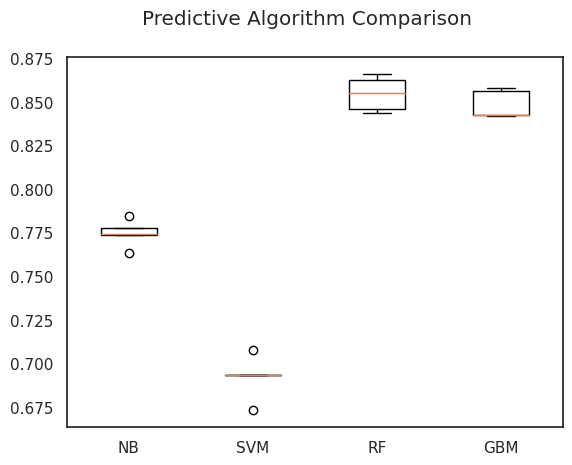

In [169]:
# comparing the predictive sklearn algorithms performance on the training set
fig = plt.figure()
fig.suptitle("Predictive Algorithm Comparison")
ax = fig.add_subplot(111)
plt.boxplot(model_results)
ax.set_xticklabels(model_names)
plt.show()

In [170]:
# Evaluating the best model, random forest classfier using the test dataset
predictive_models.append(('RF', RandomForestClassifier()))
randf = RandomForestClassifier()
best_model = randf
best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)
print(f"Best Model Accuracy Score on Test Set: {accuracy_score(y_test, y_pred)}")

Best Model Accuracy Score on Test Set: 0.8552071234998064


In [171]:
# classification report evaluation of best model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1279
           1       1.00      0.83      0.91        18
           2       0.84      0.86      0.85      1227
           3       0.76      0.27      0.40        59

    accuracy                           0.86      2583
   macro avg       0.87      0.71      0.76      2583
weighted avg       0.85      0.86      0.85      2583



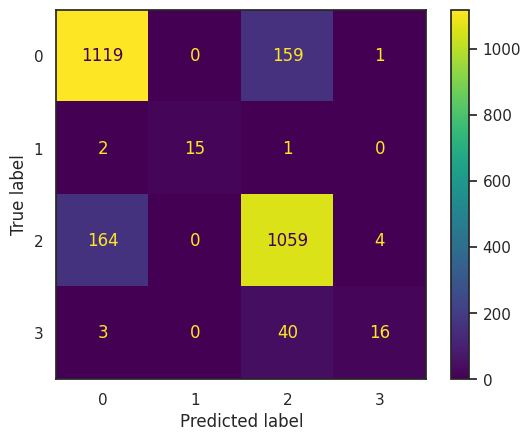

In [172]:
# confusion matrix evaluation report for best model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()
plt.show()

In [176]:
# prediction report for best model
for x in range(len(y_pred)): 
  print(f"Predicted: {y_pred[x]} Actual: {y_test[x]} Data: {x_test[x]}")

Predicted: 2 Actual: 2 Data: (154, 8853, 7697, 207, 2, 51, 166, 154, 32)
Predicted: 0 Actual: 0 Data: (100, 4767, 1379, 361, 1, 18, 29, 1, 207)
Predicted: 2 Actual: 2 Data: (86, 6443, 7064, 85, 0, 19, 38, 328, 31)
Predicted: 2 Actual: 0 Data: (152, 5984, 6068, 52, 2, 0, 0, 330, 66)
Predicted: 2 Actual: 2 Data: (111, 382, 2911, 274, 1, 20, 108, 63, 36)
Predicted: 0 Actual: 0 Data: (93, 1216, 3426, 306, 2, 114, 279, 125, 82)
Predicted: 0 Actual: 2 Data: (65, 1905, 1631, 301, 2, 7, 42, 0, 86)
Predicted: 0 Actual: 0 Data: (17, 2820, 5579, 220, 1, 74, 501, 0, 181)
Predicted: 0 Actual: 2 Data: (105, 5731, 573, 74, 3, 179, 168, 296, 135)
Predicted: 2 Actual: 2 Data: (134, 7185, 7799, 290, 1, 23, 96, 66, 31)
Predicted: 2 Actual: 2 Data: (78, 8527, 3417, 335, 4, 2, 12, 0, 61)
Predicted: 0 Actual: 0 Data: (17, 1054, 2975, 282, 2, 1, 4, 83, 174)
Predicted: 2 Actual: 2 Data: (17, 5382, 3253, 26, 0, 23, 39, 308, 41)
Predicted: 2 Actual: 2 Data: (80, 8819, 5377, 8, 0, 172, 171, 0, 36)
Predicted: 0 A